**Visualização de dados**

In [1]:
#Importando a biblioteca
import pandas as pd

In [2]:
#Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [23]:
#Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [44]:
#Criando a coluna Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [45]:
df["mes_venda"] = df["Data"].dt.month
df["Ano_Venda"] = df["Data"].dt.year
df["dia_venda"] = df["Data"].dt.day

In [4]:
{#Selecionando o número de vendas por cídigo ID da loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

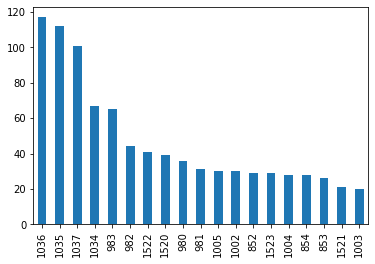

In [5]:
#Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

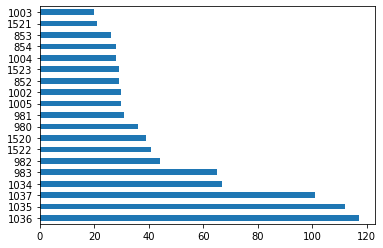

In [7]:
#Gráfico de barras horizontais
df["LojaID"].value_counts().plot.barh()

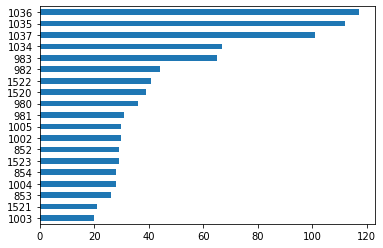

In [9]:
#Gráfico de barras horizontais - do maior valor para o menor
df["LojaID"].value_counts(ascending=True).plot.barh();

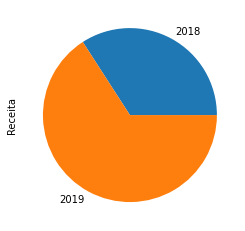

In [13]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [14]:
#Total vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

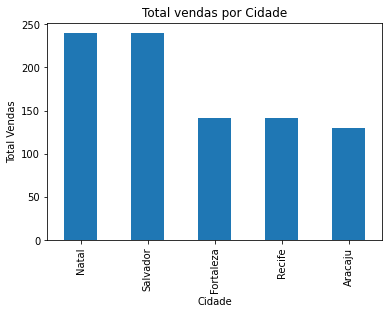

In [16]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");


Text(0, 0.5, 'Total Vendas')

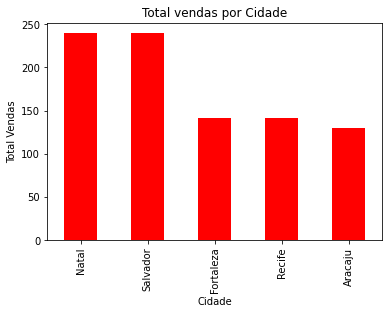

In [17]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [18]:
#Alterando o estilo
plt.style.use("ggplot")

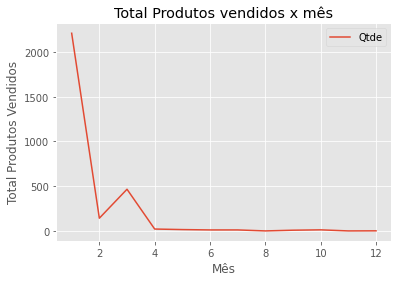

In [27]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title="Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend();

In [28]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [46]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

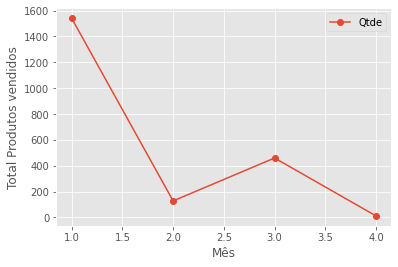

In [47]:
#Total produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend();

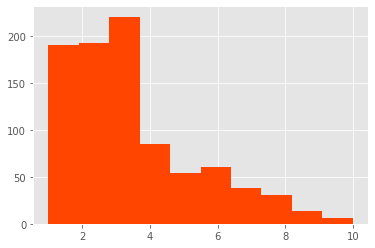

In [48]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

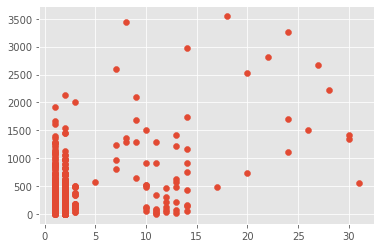

In [49]:
plt.scatter(x = df_2019["dia_venda"], y = df_2019["Receita"]);

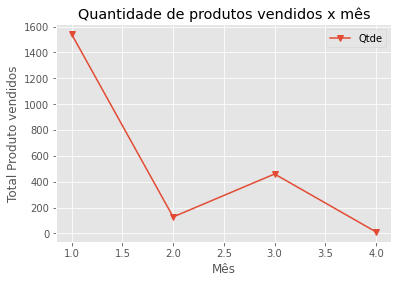

In [50]:
#Salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produto vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")